# 영화 총 상영주차 예측

## 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
movie_data= pd.read_csv("C:/Users/강태희/Documents/BAF-25-2-Marketing/week_predict/full_data_for_week_predict.csv")
movie_data.head()

,Movie_Title,Total_Audience_Count,Total_Show_Days,Total_Weeks,wk1_Audience,wk1_AudiencePerShow,wk2_Audience,wk2_AudiencePerShow,Show_Change,opening_Ho_Retention,...,e247,e248,e249,e250,e251,e252,e253,e254,e255,e256
0,도쿄 리벤저스,13122,47,8,8617.0,5.654199,2925,5.034423,0.381234,0.130780,...,0.014526,-0.000427,-0.020264,-0.001076,-0.061279,-0.018188,-0.023438,0.012329,0.036133,0.010742
1,매직브러시,169106,36,8,145560.0,37.670807,18117,14.717303,0.318582,0.182869,...,-0.022339,-0.037598,-0.021973,0.033936,-0.026855,0.005646,0.013794,-0.010071,0.014709,0.017578
2,숨바꼭질,656089,48,8,195760.0,92.645528,307980,65.807692,2.214860,0.892172,...,-0.000511,-0.023926,-0.005707,-0.001305,-0.061523,-0.008118,-0.018921,0.002823,0.055176,0.015747
3,해빙,1201576,52,9,906864.0,44.818820,232306,13.362439,0.859197,0.189943,...,0.007996,-0.017456,0.000427,-0.008911,-0.024536,-0.024658,-0.013306,0.004303,0.047119,0.011414
4,"다시, 봄",25506,18,4,18609.0,5.126446,3969,3.598368,0.303857,0.028099,...,0.052734,-0.000683,-0.014465,0.025146,-0.018188,-0.022705,-0.027100,-0.036621,0.073242,-0.016113


In [3]:
fa_data= pd.read_csv("C:/Users/강태희/Documents/BAF-25-2-Marketing/week_predict/fa_data_for_week_predict.csv")
fa_data.head()

,Movie_Title,FA1,FA2,FA3,FA4,FA5
0,도쿄 리벤저스,-0.581703,-0.873621,0.334321,-0.860584,-0.302076
1,매직브러시,-0.235392,0.273776,-1.353467,-0.748044,-0.342353
2,숨바꼭질,0.103283,2.615669,0.523378,1.502512,0.556472
3,해빙,1.734376,-0.007841,0.617193,-1.091703,-0.357989
4,"다시, 봄",-0.598004,-0.887915,0.400546,-1.055799,-0.290591


In [4]:
hit_data= pd.read_csv("C:/Users/강태희/Documents/BAF-25-2-Marketing/week_predict/movie_hit_category.csv")
hit_data.head()

,Movie_Title,hit_category
0,도쿄 리벤저스,중반 균형형
1,매직브러시,초반 폭발형
2,숨바꼭질,초반 폭발형
3,해빙,초반 폭발형
4,"다시, 봄",중반 균형형


In [5]:
# 데이터 합치기
df= pd.merge(movie_data, fa_data, on="Movie_Title", how="inner")
df= pd.merge(df, hit_data, on="Movie_Title", how="inner")
df.head()

,Movie_Title,Total_Audience_Count,Total_Show_Days,Total_Weeks,wk1_Audience,wk1_AudiencePerShow,wk2_Audience,wk2_AudiencePerShow,Show_Change,opening_Ho_Retention,...,e253,e254,e255,e256,FA1,FA2,FA3,FA4,FA5,hit_category
0,도쿄 리벤저스,13122,47,8,8617.0,5.654199,2925,5.034423,0.381234,0.130780,...,-0.023438,0.012329,0.036133,0.010742,-0.581703,-0.873621,0.334321,-0.860584,-0.302076,중반 균형형
1,매직브러시,169106,36,8,145560.0,37.670807,18117,14.717303,0.318582,0.182869,...,0.013794,-0.010071,0.014709,0.017578,-0.235392,0.273776,-1.353467,-0.748044,-0.342353,초반 폭발형
2,숨바꼭질,656089,48,8,195760.0,92.645528,307980,65.807692,2.214860,0.892172,...,-0.018921,0.002823,0.055176,0.015747,0.103283,2.615669,0.523378,1.502512,0.556472,초반 폭발형
3,해빙,1201576,52,9,906864.0,44.818820,232306,13.362439,0.859197,0.189943,...,-0.013306,0.004303,0.047119,0.011414,1.734376,-0.007841,0.617193,-1.091703,-0.357989,초반 폭발형
4,"다시, 봄",25506,18,4,18609.0,5.126446,3969,3.598368,0.303857,0.028099,...,-0.027100,-0.036621,0.073242,-0.016113,-0.598004,-0.887915,0.400546,-1.055799,-0.290591,중반 균형형


총 상영주차 예측에 쓸 변수는 FA4, 팬데믹, 영화 대표 제작국가, 영화 흥행 패턴  
여기서 추가할 변수를 찾기 위해 상관계수를 구해본다

## 상관계수 분석

In [6]:
df['hit_category'].value_counts()

hit_category
초반 폭발형     1695
중반 균형형      694
후반 입소문형     179
Name: count, dtype: int64

In [6]:
#범주형 변수 원핫인코딩
cat_cols = ['Month', 'Pandemic', 'Grade', 'Main_Country','hit_category']

# 원핫인코딩
combined_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=False, dtype=int)

# 한글 → 영어 변수명 매핑
rename_map = {
    # Grade (관람등급)
    'Grade_전체관람가': 'Grade_All',
    'Grade_12세이상관람가': 'Grade_12plus',
    'Grade_15세이상관람가': 'Grade_15plus',
    'Grade_청소년관람불가': 'Grade_Restricted',

    # Main_Country (국가)
    'Main_Country_한국': 'Country_KR',
    'Main_Country_미국': 'Country_US',
    'Main_Country_일본': 'Country_JP',
    'Main_Country_기타': 'Country_Other',

    # hit_category (영화 흥행 패턴)
    'hit_category_초반 폭발형': 'Early_Explosion',
    'hit_category_중반 균형형': 'Mid_Balanced',
    'hit_category_후반 입소문형': 'Later_Viral'
}
combined_encoded = combined_encoded.rename(columns=rename_map)


In [7]:
combined_encoded.head()

,Movie_Title,Total_Audience_Count,Total_Show_Days,Total_Weeks,wk1_Audience,wk1_AudiencePerShow,wk2_Audience,wk2_AudiencePerShow,Show_Change,opening_Ho_Retention,...,Grade_15plus,Grade_All,Grade_Restricted,Country_Other,Country_US,Country_JP,Country_KR,Mid_Balanced,Early_Explosion,Later_Viral
0,도쿄 리벤저스,13122,47,8,8617.0,5.654199,2925,5.034423,0.381234,0.130780,...,1,0,0,0,0,1,0,1,0,0
1,매직브러시,169106,36,8,145560.0,37.670807,18117,14.717303,0.318582,0.182869,...,0,1,0,1,0,0,0,0,1,0
2,숨바꼭질,656089,48,8,195760.0,92.645528,307980,65.807692,2.214860,0.892172,...,1,0,0,0,1,0,0,0,1,0
3,해빙,1201576,52,9,906864.0,44.818820,232306,13.362439,0.859197,0.189943,...,1,0,0,0,0,0,1,0,1,0
4,"다시, 봄",25506,18,4,18609.0,5.126446,3969,3.598368,0.303857,0.028099,...,0,0,0,0,0,0,1,1,0,0


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

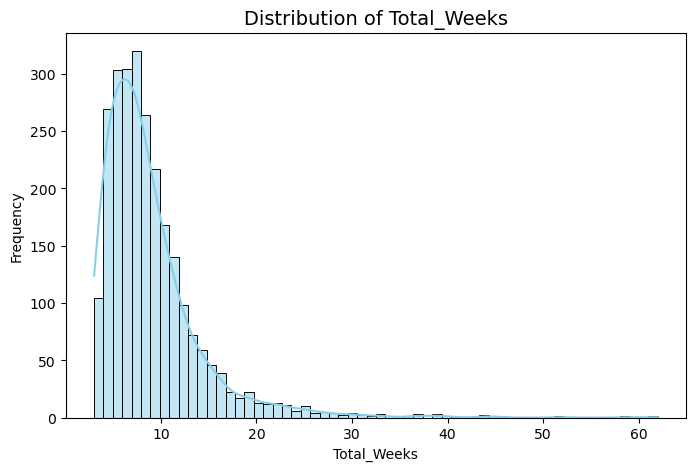

In [38]:
plt.figure(figsize=(8, 5))
sns.histplot(combined_encoded['Total_Weeks'], bins=60, kde=True, color='skyblue')

plt.title('Distribution of Total_Weeks', fontsize=14)
plt.xlabel('Total_Weeks')
plt.ylabel('Frequency')
plt.show()

In [14]:
# 주요 변수 지정
core_vars = ["FA4", "Pandemic_0", "Pandemic_1", "Pandemic_2", "Country_Other","Country_US",	"Country_JP","Country_KR", 
             'Early_Explosion', 'Mid_Balanced','Later_Viral']

# FA1~FA3, FA5, e1~e256 제외 (이전과 동일)
cols_to_drop = [f"e{i}" for i in range(1, 257)] + ["FA1", "FA2", "FA3", "FA5","Movie_Title"]
filtered_df = combined_encoded.drop(columns=cols_to_drop, errors="ignore")

# 상관계수 행렬 계산
corr_matrix = filtered_df.corr()

# 핵심 변수들과의 상관관계만 추출
corr_with_core = corr_matrix[core_vars]

# 절댓값이 큰 변수들만 선택 (예: |r| > 0.5)
threshold = 0.5
high_corr = corr_with_core[abs(corr_with_core) > threshold].dropna(how='all')

# 핵심 변수 자기 자신 제외
high_corr = high_corr.loc[~high_corr.index.isin(core_vars)]

# 결과 확인
print("핵심 변수들과 상관계수가 높은 변수들:")
print(high_corr)

핵심 변수들과 상관계수가 높은 변수들:
                           FA4  Pandemic_0  Pandemic_1  Pandemic_2  \
Total_Show_Days            NaN         NaN         NaN         NaN   
Total_Weeks                NaN         NaN         NaN         NaN   
wk2_AudiencePerShow   0.592138         NaN         NaN         NaN   
Show_Change           0.716173         NaN         NaN         NaN   
opening_Ho_Retention  0.964034         NaN         NaN         NaN   
Year                       NaN   -0.723462         NaN    0.530996   

                      Country_Other  Country_US  Country_JP  Country_KR  \
Total_Show_Days                 NaN         NaN         NaN         NaN   
Total_Weeks                     NaN         NaN         NaN         NaN   
wk2_AudiencePerShow             NaN         NaN         NaN         NaN   
Show_Change                     NaN         NaN         NaN         NaN   
opening_Ho_Retention            NaN         NaN         NaN         NaN   
Year                            NaN  

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X = combined_encoded[["FA4", "Pandemic_0", "Pandemic_1", "Pandemic_2", "Country_Other","Country_US", "Country_JP","Country_KR", 
                      'Early_Explosion', 'Mid_Balanced','Later_Viral',
                      "wk2_AudiencePerShow", "Show_Change", "opening_Ho_Retention"]].dropna()

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

                 feature        VIF
0                    FA4  19.585708
1             Pandemic_0        inf
2             Pandemic_1        inf
3             Pandemic_2        inf
4          Country_Other        inf
5             Country_US        inf
6             Country_JP        inf
7             Country_KR        inf
8        Early_Explosion        inf
9           Mid_Balanced        inf
10           Later_Viral        inf
11   wk2_AudiencePerShow   1.867773
12           Show_Change   2.545153
13  opening_Ho_Retention  16.111717


c:\uni\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [11]:
# opening_Ho_Retentiond을 제외하고 다시 vif 구해보기

X = combined_encoded[["FA4", "Pandemic_0", "Pandemic_1", "Pandemic_2", "Country_Other","Country_US", "Country_JP","Country_KR", 
                      'Early_Explosion', 'Mid_Balanced','Later_Viral',
                      "wk2_AudiencePerShow", "Show_Change"]].dropna()

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

                feature       VIF
0                   FA4  2.525333
1            Pandemic_0       inf
2            Pandemic_1       inf
3            Pandemic_2       inf
4         Country_Other       inf
5            Country_US       inf
6            Country_JP       inf
7            Country_KR       inf
8       Early_Explosion       inf
9          Mid_Balanced       inf
10          Later_Viral       inf
11  wk2_AudiencePerShow  1.865931
12          Show_Change  2.376742


c:\uni\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


총 상영주차 예측에 쓸 변수는 FA4, 팬데믹, 영화 대표 제작국가, 영화 흥행 패턴  
여기서 추가로 wk2_AudiencePerShow ,Show_Change 만 사용할 것

## 학습 데이터셋 설정

In [8]:
# 다시 train / test 분리
df_train_encoded = combined_encoded.iloc[:2054, :].copy()
df_test_encoded = combined_encoded.iloc[2054:, :].copy()

# 확인
print("Train shape:", df_train_encoded.shape)
print("Test shape:", df_test_encoded.shape)
print(df_test_encoded.head())

Train shape: (2054, 307)
Test shape: (514, 307)
                  Movie_Title  Total_Audience_Count  Total_Show_Days  \
2054  버즈 오브 프레이(할리 퀸의 황홀한 해방)                400643               63   
2055                      언데드                214638               41   
2056                   정글 크루즈                246029               28   
2057                       핸콕               2722284               35   
2058                     잭 리처                782892               22   

      Total_Weeks  wk1_Audience  wk1_AudiencePerShow  wk2_Audience  \
2054           10      264467.0            11.721789        115766   
2055            7      123849.0            30.258734         68579   
2056            5      155216.0            13.723784         81108   
2057            6     1318928.0            72.033206        979822   
2058            4      464142.0            60.839166        278123   

      wk2_AudiencePerShow  Show_Change  opening_Ho_Retention  ...  \
2054             8.792132    

In [9]:
# 학습 데이터셋 만들기

# 1. 타겟 (Y) 컬럼 목록 정의
target_columns = ['Total_Weeks']

# 2. X (특성 데이터) 생성: 타겟 컬럼들을 제외한 나머지
X = df_train_encoded[["FA1","FA2","FA3","FA4","FA5", "Pandemic_0", "Pandemic_1", "Pandemic_2", 
                      "Country_Other","Country_US", "Country_JP","Country_KR", 
                      'Early_Explosion', 'Mid_Balanced','Later_Viral']]

# 3. Y (타겟 데이터) 생성: 타겟 컬럼들만 선택
y = df_train_encoded[target_columns]

# 결과 확인
print(X.columns.tolist())
print(y.columns.tolist())

['FA1', 'FA2', 'FA3', 'FA4', 'FA5', 'Pandemic_0', 'Pandemic_1', 'Pandemic_2', 'Country_Other', 'Country_US', 'Country_JP', 'Country_KR', 'Early_Explosion', 'Mid_Balanced', 'Later_Viral']
['Total_Weeks']


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
X_train.shape[0]

1643

In [12]:
X_train.shape[1]

15

## XGB 모델 예측

옵튜나로 파라미터 조절

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from xgboost import XGBRegressor

In [14]:
import optuna

In [15]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def objective(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 10),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 10),
        'random_state': 42,
        'tree_method': 'hist'  
    }

    model = XGBRegressor(**params)
    model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

    y_pred = model.predict(X_val)

    # 여러 지표 계산
    rmse_val = rmse(y_val, y_pred)
    mae_val = mean_absolute_error(y_val, y_pred)
    r2_val = r2_score(y_val, y_pred)

    # 참고용 출력 (튜닝 과정에서 로그로 볼 수 있음)
    trial.set_user_attr("MAE", mae_val)
    trial.set_user_attr("R2", r2_val)

    # 최적화 기준은 RMSE (낮을수록 좋음)
    return rmse_val

# Optuna 실행
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# 결과 출력
best_trial = study.best_trial
print(f"Best RMSE: {best_trial.value:.4f}")
print("Best Parameters:")
for key, value in best_trial.params.items():
    print(f"  {key}: {value}")
print(f"MAE: {best_trial.user_attrs['MAE']:.4f}, R²: {best_trial.user_attrs['R2']:.4f}")

[I 2025-11-08 09:56:53,743] A new study created in memory with name: no-name-4cae8d00-0565-43ee-95e0-4d802f7ced92
[I 2025-11-08 09:56:55,236] Trial 0 finished with value: 4.6759065282384125 and parameters: {'max_depth': 10, 'learning_rate': 0.16556606601699458, 'n_estimators': 760, 'subsample': 0.6392132909546783, 'colsample_bytree': 0.9879082425828603, 'min_child_weight': 3, 'reg_alpha': 1.1804449384149038, 'reg_lambda': 4.080513864854344}. Best is trial 0 with value: 4.6759065282384125.
[I 2025-11-08 09:56:55,354] Trial 1 finished with value: 4.648771776490312 and parameters: {'max_depth': 3, 'learning_rate': 0.02680255689673254, 'n_estimators': 173, 'subsample': 0.6760898728222966, 'colsample_bytree': 0.5182933269198313, 'min_child_weight': 2, 'reg_alpha': 8.087324549619266, 'reg_lambda': 6.404879850591063}. Best is trial 1 with value: 4.648771776490312.
[I 2025-11-08 09:56:55,974] Trial 2 finished with value: 4.706640170414772 and parameters: {'max_depth': 6, 'learning_rate': 0.274

Best RMSE: 4.5113
Best Parameters:
  max_depth: 3
  learning_rate: 0.0549684335620661
  n_estimators: 240
  subsample: 0.7946292735494849
  colsample_bytree: 0.8992817453443418
  min_child_weight: 6
  reg_alpha: 8.178274980247396
  reg_lambda: 5.751562643960964
MAE: 2.5278, R²: 0.4807


XGB의 Best Parameters:   
  max_depth: 3  
  learning_rate: 0.0185460119639627  
  n_estimators: 446  
  subsample: 0.5982013911067369  
  colsample_bytree: 0.9989002824900927  
  min_child_weight: 4  
  reg_alpha: 0.7823191644342076  
  reg_lambda: 2.940216934269445  

### random search로 파라미터 조절

In [31]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

In [36]:
xgb = XGBRegressor(
    objective='reg:squarederror',
    tree_method='hist',      
    random_state=42,
    n_estimators=500         
)

# -----------------------------------------
# 랜덤서치 하이퍼파라미터 범위 정의
# -----------------------------------------
param_distributions = {
    'learning_rate': np.linspace(0.01, 0.3, 30),
    'max_depth': np.arange(3, 10),
    'min_child_weight': np.arange(1, 10),
    'subsample': np.linspace(0.5, 1.0, 6),
    'colsample_bytree': np.linspace(0.5, 1.0, 6),
    'gamma': np.linspace(0, 5, 11),
    'reg_alpha': np.logspace(-3, 1, 10),  # L1 정규화
    'reg_lambda': np.logspace(-3, 1, 10)  # L2 정규화
}

# -----------------------------------------
# RandomizedSearchCV 실행
# -----------------------------------------
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_distributions,
    n_iter=50,                   # 랜덤 탐색 시도 횟수 (보통 30~100 적당)
    scoring='neg_root_mean_squared_error',
    cv=5,                        
    verbose=2,
    random_state=42,
    n_jobs=-1                    
)

random_search.fit(X_train, y_train)

# -----------------------------------------
# 결과 출력
# -----------------------------------------
print("\ Best RMSE (CV):", -random_search.best_score_)
print(" Best Parameters:", random_search.best_params_)

# -----------------------------------------
# 6️⃣ 최적 모델로 테스트 세트 평가
# -----------------------------------------
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_val)

rmse = mean_squared_error(y_val, y_pred, squared=False)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("\n Test Set Performance")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²  : {r2:.4f}")

<>:41: SyntaxWarning: invalid escape sequence '\ '
<>:41: SyntaxWarning: invalid escape sequence '\ '
C:\Users\강태희\AppData\Local\Temp\ipykernel_20304\2783306007.py:41: SyntaxWarning: invalid escape sequence '\ '
  print("\ Best RMSE (CV):", -random_search.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
\ Best RMSE (CV): 3.7269386615490867
 Best Parameters: {'subsample': 1.0, 'reg_lambda': 10.0, 'reg_alpha': 0.001, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.16999999999999998, 'gamma': 3.0, 'colsample_bytree': 1.0}

 Test Set Performance
RMSE: 4.7939
MAE : 2.7218
R²  : 0.4136


c:\uni\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## LGB 모델 예측

In [16]:
from lightgbm import LGBMRegressor

In [17]:
def objective(trial):
    params = {
        'num_leaves': trial.suggest_int('num_leaves', 20, 40),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'min_child_weight': trial.suggest_int('min_child_weight', 5, 20),
        'max_depth': trial.suggest_int('max_depth', 10, 30),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 0.8),
        'random_state': 42,
        'force_row_wise': True,
        'verbose': -1 
    }
    model = LGBMRegressor(**params)

    model.fit(X_train, y_train, eval_set=[(X_val, y_val)],)
    y_pred = model.predict(X_val)

    # 여러 지표 계산
    rmse_val = rmse(y_val, y_pred)
    mae_val = mean_absolute_error(y_val, y_pred)
    r2_val = r2_score(y_val, y_pred)

    # 참고용 출력 (튜닝 과정에서 로그로 볼 수 있음)
    trial.set_user_attr("MAE", mae_val)
    trial.set_user_attr("R2", r2_val)

    # 최적화 기준은 RMSE (낮을수록 좋음)
    return rmse_val

# Optuna 실행
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# 결과 출력
best_trial = study.best_trial
print(f"Best RMSE: {best_trial.value:.4f}")
print("Best Parameters:")
for key, value in best_trial.params.items():
    print(f"  {key}: {value}")
print(f"MAE: {best_trial.user_attrs['MAE']:.4f}, R²: {best_trial.user_attrs['R2']:.4f}")

[I 2025-11-08 09:57:36,340] A new study created in memory with name: no-name-39c08510-c338-41b4-bb5a-c0420163cec5
[I 2025-11-08 09:57:37,605] Trial 0 finished with value: 4.821384865764379 and parameters: {'num_leaves': 24, 'n_estimators': 766, 'min_child_weight': 8, 'max_depth': 16, 'learning_rate': 0.05653869873063062, 'colsample_bytree': 0.45619345814178636}. Best is trial 0 with value: 4.821384865764379.
[I 2025-11-08 09:57:38,197] Trial 1 finished with value: 4.787579991596073 and parameters: {'num_leaves': 27, 'n_estimators': 873, 'min_child_weight': 15, 'max_depth': 17, 'learning_rate': 0.03749978739384642, 'colsample_bytree': 0.4232740584267552}. Best is trial 1 with value: 4.787579991596073.
[I 2025-11-08 09:57:38,290] Trial 2 finished with value: 4.620221425694318 and parameters: {'num_leaves': 25, 'n_estimators': 128, 'min_child_weight': 20, 'max_depth': 13, 'learning_rate': 0.08621259802849841, 'colsample_bytree': 0.6152273710767058}. Best is trial 2 with value: 4.620221425

Best RMSE: 4.5004
Best Parameters:
  num_leaves: 30
  n_estimators: 101
  min_child_weight: 16
  max_depth: 27
  learning_rate: 0.06370691435644275
  colsample_bytree: 0.7988540812212758
MAE: 2.5521, R²: 0.4832


LGB의 Best Parameters:  
  num_leaves: 40  
  n_estimators: 107  
  min_child_weight: 18  
  max_depth: 16  
  learning_rate: 0.031136929532986968  
  colsample_bytree: 0.7798132673179637  

In [22]:
import numpy as np
from lightgbm import LGBMRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [23]:
lgb = LGBMRegressor(
    objective='regression',
    random_state=42,
    n_estimators=1000,
)

# --------------------------
# 하이퍼파라미터 범위 설정
# --------------------------
param_distributions = {
    'num_leaves': np.arange(20, 200, 10),
    'max_depth': np.arange(3, 15),
    'learning_rate': np.linspace(0.01, 0.3, 30),
    'subsample': np.linspace(0.5, 1.0, 6),
    'colsample_bytree': np.linspace(0.5, 1.0, 6),
    'min_child_samples': np.arange(5, 100, 5),
    'reg_alpha': np.logspace(-3, 1, 10),
    'reg_lambda': np.logspace(-3, 1, 10)
}

# --------------------------
#  랜덤서치 수행
# --------------------------
random_search_lgb = RandomizedSearchCV(
    estimator=lgb,
    param_distributions=param_distributions,
    n_iter=50,
    scoring='neg_root_mean_squared_error',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search_lgb.fit(X_train, y_train)

# --------------------------
# 5️⃣ 결과 및 평가
# --------------------------
print("\n Best RMSE (CV):", -random_search_lgb.best_score_)
print(" Best Parameters:", random_search_lgb.best_params_)

best_lgb = random_search_lgb.best_estimator_
y_pred = best_lgb.predict(X_val)

rmse = mean_squared_error(y_val, y_pred, squared=False)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("\n Test Set Performance (LightGBM)")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²  : {r2:.4f}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits

 Best RMSE (CV): 3.558659016996296
 Best Parameters: {'subsample': 1.0, 'reg_lambda': 0.021544346900318832, 'reg_alpha': 0.46415888336127775, 'num_leaves': 70, 'min_child_samples': 95, 'max_depth': 4, 'learning_rate': 0.019999999999999997, 'colsample_bytree': 0.6}

 Test Set Performance (LightGBM)
RMSE: 4.6332
MAE : 2.5719
R²  : 0.4522


c:\uni\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Catboost 모델 예측

In [18]:
from catboost import CatBoostRegressor

In [19]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Optuna objective 함수
def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 500, 1000),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 15),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 1.0),
        'random_strength': trial.suggest_float('random_strength', 1e-9, 10),
        'random_seed': 42,
        'verbose': False,
        'thread_count': -1
    }

    model = CatBoostRegressor(**params)
    model.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=50)
    
    y_pred = model.predict(X_val)
    
    # 여러 지표 계산
    rmse_val = rmse(y_val, y_pred)
    mae_val = mean_absolute_error(y_val, y_pred)
    r2_val = r2_score(y_val, y_pred)

    # 참고용 출력 (튜닝 과정에서 로그로 볼 수 있음)
    trial.set_user_attr("MAE", mae_val)
    trial.set_user_attr("R2", r2_val)

    return rmse(y_val, y_pred)

# Optuna 실행
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# 결과 출력
best_trial = study.best_trial
print(f"Best RMSE: {best_trial.value:.4f}")
print("Best Parameters:")
for key, value in best_trial.params.items():
    print(f"  {key}: {value}")
print(f"MAE: {best_trial.user_attrs['MAE']:.4f}, R²: {best_trial.user_attrs['R2']:.4f}")

[I 2025-11-08 09:58:16,901] A new study created in memory with name: no-name-2f586bd7-7f84-4ebb-a0a0-9b50a09fe7ee
[I 2025-11-08 09:58:17,675] Trial 0 finished with value: 4.567033612437051 and parameters: {'iterations': 682, 'depth': 5, 'learning_rate': 0.040998581079393255, 'l2_leaf_reg': 9.654640098621059, 'border_count': 109, 'bagging_temperature': 0.2342590932173717, 'random_strength': 7.236166694511304}. Best is trial 0 with value: 4.567033612437051.
[I 2025-11-08 09:58:18,084] Trial 1 finished with value: 4.557411362853796 and parameters: {'iterations': 959, 'depth': 9, 'learning_rate': 0.2890470176280408, 'l2_leaf_reg': 13.091986428382116, 'border_count': 60, 'bagging_temperature': 0.723009545010962, 'random_strength': 1.6179601705692959}. Best is trial 1 with value: 4.557411362853796.
[I 2025-11-08 09:58:18,709] Trial 2 finished with value: 4.580838145654714 and parameters: {'iterations': 743, 'depth': 9, 'learning_rate': 0.16374344476798056, 'l2_leaf_reg': 6.241517427599611, '

Best RMSE: 4.4265
Best Parameters:
  iterations: 982
  depth: 7
  learning_rate: 0.14134663581240323
  l2_leaf_reg: 1.9155329313504152
  border_count: 140
  bagging_temperature: 0.4921993940241448
  random_strength: 2.956849681363772
MAE: 2.4651, R²: 0.5000


Best RMSE: 4.4265
Best Parameters:
  iterations: 982  
  depth: 7  
  learning_rate: 0.14134663581240323  
  l2_leaf_reg: 1.9155329313504152  
  border_count: 140  
  bagging_temperature: 0.4921993940241448  
  random_strength: 2.956849681363772  
MAE: 2.4651, R²: 0.5000  

In [20]:
import numpy as np
from catboost import CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [21]:
cat = CatBoostRegressor(
    loss_function='RMSE',
    random_state=42,
    silent=True
)

# --------------------------
# 3하이퍼파라미터 범위 설정
# --------------------------
param_distributions = {
    'depth': np.arange(3, 12),
    'learning_rate': np.linspace(0.01, 0.3, 30),
    'iterations': np.arange(300, 1200, 100),
    'l2_leaf_reg': np.linspace(1, 10, 10),
    'bagging_temperature': np.linspace(0, 1, 11),
    'border_count': [32, 64, 128, 254],
}

# --------------------------
# 4랜덤서치 수행
# --------------------------
random_search_cat = RandomizedSearchCV(
    estimator=cat,
    param_distributions=param_distributions,
    n_iter=40,
    scoring='neg_root_mean_squared_error',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search_cat.fit(X_train, y_train)

# --------------------------
# 5️⃣ 결과 및 평가
# --------------------------
print("\n✅ Best RMSE (CV):", -random_search_cat.best_score_)
print("✅ Best Parameters:", random_search_cat.best_params_)

best_cat = random_search_cat.best_estimator_
y_pred = best_cat.predict(X_val)

rmse = mean_squared_error(y_val, y_pred, squared=False)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("\n📊 Test Set Performance (CatBoost)")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²  : {r2:.4f}")

Fitting 5 folds for each of 40 candidates, totalling 200 fits

✅ Best RMSE (CV): 3.5269362661308654
✅ Best Parameters: {'learning_rate': 0.08999999999999998, 'l2_leaf_reg': 6.0, 'iterations': 400, 'depth': 3, 'border_count': 64, 'bagging_temperature': 0.1}

📊 Test Set Performance (CatBoost)
RMSE: 4.5500
MAE : 2.5787
R²  : 0.4717


c:\uni\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Lasso

In [25]:
# lasso 모델은 원핫인코딩 할 때 drop_first=True로 더미변수를 만들거나, 다중공선성을 제거해야함 
# 기준 변수를 하나씩 제거해서 완전한 선형 종속성이 생기는 것을 방지

# 1. 타겟 (Y) 컬럼 목록 정의
target_columns = ['Total_Weeks']

# 2. X (특성 데이터) 생성: 타겟 컬럼들을 제외한 나머지
X = df_train_encoded[["FA1","FA2","FA3","FA4","FA5", "Pandemic_1", "Pandemic_2", "Country_US", "Country_JP","Country_KR", 
                      'Mid_Balanced','Later_Viral']]

# 3. Y (타겟 데이터) 생성: 타겟 컬럼들만 선택
y = df_train_encoded[target_columns]

# 결과 확인
print(X.columns.tolist())
print(y.columns.tolist())

['FA1', 'FA2', 'FA3', 'FA4', 'FA5', 'Pandemic_1', 'Pandemic_2', 'Country_US', 'Country_JP', 'Country_KR', 'Mid_Balanced', 'Later_Viral']
['Total_Weeks']


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
X_train.shape[0]

1643

In [28]:
X_train.shape[1]

12

In [29]:
# optuna로 파라미터 조절
import optuna
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [30]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_val)

In [31]:
def objective(trial):
    alpha = trial.suggest_float("alpha", 1e-5, 10.0, log=True)

    model = Lasso(alpha=alpha, random_state=42, max_iter=1000)

    # 교차검증으로 안정적인 RMSE 계산
    rmse = -cross_val_score(model, X_train_scaled, y_train,
                            scoring="neg_root_mean_squared_error",
                            cv=5).mean()
    return rmse

# --------------------------
# Optuna 실행
# --------------------------
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50, timeout=120)  # 시간이나 시도 횟수 조정 가능

print("Best RMSE:", study.best_value)
print("Best Params:", study.best_params)

# --------------------------
# 최적 모델로 평가
# --------------------------
best_alpha = study.best_params["alpha"]
best_model = Lasso(alpha=best_alpha, random_state=42, max_iter=10000)
best_model.fit(X_train_scaled, y_train)

y_pred = best_model.predict(X_test_scaled)

rmse = mean_squared_error(y_val, y_pred, squared=False)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("\n 최종 성능 평가")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²  : {r2:.4f}")

[I 2025-11-08 10:05:08,042] A new study created in memory with name: no-name-bb3070d0-81f2-4839-88eb-3604e69ae36f
[I 2025-11-08 10:05:08,186] Trial 0 finished with value: 3.7325495263688517 and parameters: {'alpha': 0.009892664433629902}. Best is trial 0 with value: 3.7325495263688517.
[I 2025-11-08 10:05:08,211] Trial 1 finished with value: 3.7333369757051593 and parameters: {'alpha': 0.00034054614918241545}. Best is trial 0 with value: 3.7325495263688517.
[I 2025-11-08 10:05:08,242] Trial 2 finished with value: 3.733198459371711 and parameters: {'alpha': 0.001963950570840926}. Best is trial 0 with value: 3.7325495263688517.
[I 2025-11-08 10:05:08,259] Trial 3 finished with value: 3.733284468585223 and parameters: {'alpha': 0.000934756110932356}. Best is trial 0 with value: 3.7325495263688517.
[I 2025-11-08 10:05:08,289] Trial 4 finished with value: 3.7328088970978315 and parameters: {'alpha': 0.00680935724552687}. Best is trial 0 with value: 3.7325495263688517.
[I 2025-11-08 10:05:08

Best RMSE: 3.731764102658583
Best Params: {'alpha': 0.026726009074310605}

 최종 성능 평가
RMSE: 4.7250
MAE : 2.6437
R²  : 0.4303


c:\uni\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


그냥 변수 넣고 빼고 반복해서 돌려보자 성능이 너무 안좋다...

In [68]:
# 학습 데이터셋 만들기

# 1. 타겟 (Y) 컬럼 목록 정의
target_columns = ['Total_Weeks']

# 2. X (특성 데이터) 생성: 타겟 컬럼들을 제외한 나머지
X = df_train_encoded[["FA4", "Pandemic_0", "Pandemic_1", "Pandemic_2", "Country_Other","Country_US", "Country_JP","Country_KR", 
                     'Early_Explosion', 'Mid_Balanced','Later_Viral','opening_AudienceStd','wk1_Audience','wk2_Audience',
                     'opening_Ho_Retention','wk1_Holiday_ShowMean','wk2_Holiday_ShowMean','wk1_Holiday_AudienceMean',
                     'wk2_Holiday_AudienceMean']]

# 3. Y (타겟 데이터) 생성: 타겟 컬럼들만 선택
y = df_train_encoded[target_columns]

# 결과 확인
print(X.columns.tolist())
print(y.columns.tolist())

['FA4', 'Pandemic_0', 'Pandemic_1', 'Pandemic_2', 'Country_Other', 'Country_US', 'Country_JP', 'Country_KR', 'Early_Explosion', 'Mid_Balanced', 'Later_Viral', 'opening_AudienceStd', 'wk1_Audience', 'wk2_Audience', 'opening_Ho_Retention', 'wk1_Holiday_ShowMean', 'wk2_Holiday_ShowMean', 'wk1_Holiday_AudienceMean', 'wk2_Holiday_AudienceMean']
['Total_Weeks']


X = df_train_encoded[["FA4", "Pandemic_0", "Pandemic_1", "Pandemic_2", "Country_Other","Country_US", "Country_JP","Country_KR", 
                     'Early_Explosion', 'Mid_Balanced','Later_Viral','opening_AudienceStd','wk2_Holiday_AudienceMean','wk2_Holiday_ShowMean',
                     'wk1_Audience', 'wk1_AudiencePerShow',	'wk2_Audience',	'wk2_AudiencePerShow', 'Show_Change', 'opening_Ho_Retention',
                     'wk1_Holiday_AudienceMean','wk1_Holiday_ShowMean']]  
                     -rmse:4.3 r^2:0.51

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def objective(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 10),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 10),
        'random_state': 42,
        'tree_method': 'hist'  
    }

    model = XGBRegressor(**params)
    model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

    y_pred = model.predict(X_val)

    # 여러 지표 계산
    rmse_val = rmse(y_val, y_pred)
    mae_val = mean_absolute_error(y_val, y_pred)
    r2_val = r2_score(y_val, y_pred)

    # 참고용 출력 (튜닝 과정에서 로그로 볼 수 있음)
    trial.set_user_attr("MAE", mae_val)
    trial.set_user_attr("R2", r2_val)

    # 최적화 기준은 RMSE (낮을수록 좋음)
    return rmse_val

# Optuna 실행
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# 결과 출력
best_trial = study.best_trial
print(f"Best RMSE: {best_trial.value:.4f}")
print("Best Parameters:")
for key, value in best_trial.params.items():
    print(f"  {key}: {value}")
print(f"MAE: {best_trial.user_attrs['MAE']:.4f}, R²: {best_trial.user_attrs['R2']:.4f}")

[I 2025-11-05 15:57:11,586] A new study created in memory with name: no-name-36d4cfd2-c67b-4aac-a97f-0577b5055670
[I 2025-11-05 15:57:12,285] Trial 0 finished with value: 4.509456377028925 and parameters: {'max_depth': 3, 'learning_rate': 0.16316489805132997, 'n_estimators': 728, 'subsample': 0.5000104756989756, 'colsample_bytree': 0.7113586094730276, 'min_child_weight': 8, 'reg_alpha': 8.486825067443275, 'reg_lambda': 8.61389668079485}. Best is trial 0 with value: 4.509456377028925.
[I 2025-11-05 15:57:13,500] Trial 1 finished with value: 4.724083968040289 and parameters: {'max_depth': 10, 'learning_rate': 0.2912461552917846, 'n_estimators': 886, 'subsample': 0.8744685805261311, 'colsample_bytree': 0.9486640566632187, 'min_child_weight': 2, 'reg_alpha': 5.776608570402527, 'reg_lambda': 2.460211244782082}. Best is trial 0 with value: 4.509456377028925.
[I 2025-11-05 15:57:13,616] Trial 2 finished with value: 4.442907634790867 and parameters: {'max_depth': 3, 'learning_rate': 0.14355692

Best RMSE: 4.3258
Best Parameters:
  max_depth: 3
  learning_rate: 0.13537855717294683
  n_estimators: 249
  subsample: 0.576918374853744
  colsample_bytree: 0.8154083320108116
  min_child_weight: 10
  reg_alpha: 1.8646438768135667
  reg_lambda: 1.333581941369193
MAE: 2.4585, R²: 0.5225


In [70]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Optuna objective 함수
def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 500, 1000),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 15),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 1.0),
        'random_strength': trial.suggest_float('random_strength', 1e-9, 10),
        'random_seed': 42,
        'verbose': False,
        'thread_count': -1
    }

    model = CatBoostRegressor(**params)
    model.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=50)
    
    y_pred = model.predict(X_val)
    
    # 여러 지표 계산
    rmse_val = rmse(y_val, y_pred)
    mae_val = mean_absolute_error(y_val, y_pred)
    r2_val = r2_score(y_val, y_pred)

    # 참고용 출력 (튜닝 과정에서 로그로 볼 수 있음)
    trial.set_user_attr("MAE", mae_val)
    trial.set_user_attr("R2", r2_val)

    return rmse(y_val, y_pred)

# Optuna 실행
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# 결과 출력
best_trial = study.best_trial
print(f"Best RMSE: {best_trial.value:.4f}")
print("Best Parameters:")
for key, value in best_trial.params.items():
    print(f"  {key}: {value}")
print(f"MAE: {best_trial.user_attrs['MAE']:.4f}, R²: {best_trial.user_attrs['R2']:.4f}")

[I 2025-11-05 15:53:21,637] A new study created in memory with name: no-name-0e1ce1c9-5be4-4e10-ace0-63afccfe0ce3
[I 2025-11-05 15:53:22,267] Trial 0 finished with value: 4.5919607397207525 and parameters: {'iterations': 983, 'depth': 4, 'learning_rate': 0.021047482531425833, 'l2_leaf_reg': 14.001541567085253, 'border_count': 230, 'bagging_temperature': 0.3308884979784501, 'random_strength': 1.6788936872919575}. Best is trial 0 with value: 4.5919607397207525.
[I 2025-11-05 15:53:23,072] Trial 1 finished with value: 4.525242831143951 and parameters: {'iterations': 779, 'depth': 5, 'learning_rate': 0.014118972195744369, 'l2_leaf_reg': 4.812168258859659, 'border_count': 54, 'bagging_temperature': 0.6569063504863751, 'random_strength': 7.301212666131683}. Best is trial 1 with value: 4.525242831143951.
[I 2025-11-05 15:53:23,561] Trial 2 finished with value: 4.482902958127093 and parameters: {'iterations': 966, 'depth': 4, 'learning_rate': 0.02991906045519048, 'l2_leaf_reg': 2.0148625466331

Best RMSE: 4.2877
Best Parameters:
  iterations: 905
  depth: 5
  learning_rate: 0.23486244517249405
  l2_leaf_reg: 4.342072180612699
  border_count: 60
  bagging_temperature: 0.875725464762179
  random_strength: 7.45320153234948
MAE: 2.4449, R²: 0.5309


## 테스트해보기

In [39]:
X_test= df_test_encoded[["FA1","FA2","FA3","FA4","FA5",
                         "Pandemic_0", "Pandemic_1", "Pandemic_2", 
                         "Country_Other","Country_US", "Country_JP","Country_KR", 
                         'Early_Explosion', 'Mid_Balanced','Later_Viral']]

Best RMSE: 4.4265  
Best Parameters:  
  iterations: 982  
  depth: 7  
  learning_rate: 0.14134663581240323  
  l2_leaf_reg: 1.9155329313504152  
  border_count: 140  
  bagging_temperature: 0.4921993940241448  
  random_strength: 2.956849681363772  
MAE: 2.4651, R²: 0.5000  

In [40]:
best_params = {
    'iterations': 982,
    'depth': 7,
    'learning_rate': 0.14134663581240323,
    'l2_leaf_reg': 1.9155329313504152,
    'border_count': 140,
    'bagging_temperature': 0.4921993940241448,
    'random_strength': 2.956849681363772
}

final_model = CatBoostRegressor(**best_params)
final_model.fit(X_train, y_train)

df_test_encoded['Total_weeks_predict'] = final_model.predict(X_test)

0:	learn: 4.7385278	total: 17.1ms	remaining: 16.8s
1:	learn: 4.4883422	total: 23ms	remaining: 11.3s
2:	learn: 4.3225154	total: 29.4ms	remaining: 9.6s
3:	learn: 4.1425895	total: 33.9ms	remaining: 8.28s
4:	learn: 3.9959458	total: 38.2ms	remaining: 7.46s
5:	learn: 3.9022576	total: 43ms	remaining: 6.99s
6:	learn: 3.7983175	total: 48ms	remaining: 6.69s
7:	learn: 3.7269807	total: 53.4ms	remaining: 6.5s
8:	learn: 3.6507993	total: 60.2ms	remaining: 6.51s
9:	learn: 3.5818544	total: 66.6ms	remaining: 6.48s
10:	learn: 3.5435065	total: 70ms	remaining: 6.18s
11:	learn: 3.5012262	total: 75.6ms	remaining: 6.11s
12:	learn: 3.4567717	total: 81.8ms	remaining: 6.1s
13:	learn: 3.4208855	total: 86.1ms	remaining: 5.95s
14:	learn: 3.3941233	total: 90.5ms	remaining: 5.83s
15:	learn: 3.3679889	total: 94.3ms	remaining: 5.69s
16:	learn: 3.3337748	total: 99ms	remaining: 5.62s
17:	learn: 3.3090093	total: 103ms	remaining: 5.51s
18:	learn: 3.2873399	total: 107ms	remaining: 5.4s
19:	learn: 3.2647473	total: 110ms	rema

In [64]:
df_test_encoded[['Total_Weeks','Total_weeks_predict']].head(30)

,Total_Weeks,Total_weeks_predict
2054,10,7.007345
2055,7,7.578921
2056,5,6.318602
2057,6,8.341657
2058,4,5.997245
2059,11,12.976987
2060,5,4.269891
2061,13,11.649769
2062,4,4.058880
2063,4,9.076057


In [42]:
# 예측 결과를 반올림하여 정수형으로 변환 후 실제값과의 차이 계산
df_test_encoded["Diff"] = df_test_encoded["Total_Weeks"] - np.round(df_test_encoded["Total_weeks_predict"]).astype(int)

# 절대 오차(오차 크기)도 계산
df_test_encoded["Abs_Diff"] = df_test_encoded["Diff"].abs()

# 요약 통계 확인
print(df_test_encoded[["Total_Weeks", "Total_weeks_predict", "Diff", "Abs_Diff"]].head(10))
print("\n 오차 통계 요약:")
print(df_test_encoded[["Diff", "Abs_Diff"]].describe().round(2))

# 평균 오차 (bias) 및 평균 절대 오차 (MAE)
mean_diff = df_test_encoded["Diff"].mean()
mean_abs_diff = df_test_encoded["Abs_Diff"].mean()

print(f"\n평균 오차 (예측의 방향성 확인용): {mean_diff:.3f} 주")
print(f"평균 절대 오차 (실질 오차 크기): {mean_abs_diff:.3f} 주")

      Total_Weeks  Total_weeks_predict  Diff  Abs_Diff
2054           10             7.007345     3         3
2055            7             7.578921    -1         1
2056            5             6.318602    -1         1
2057            6             8.341657    -2         2
2058            4             5.997245    -2         2
2059           11            12.976987    -2         2
2060            5             4.269891     1         1
2061           13            11.649769     1         1
2062            4             4.058880     0         0
2063            4             9.076057    -5         5

 오차 통계 요약:
         Diff  Abs_Diff
count  514.00    514.00
mean    -0.06      2.47
std      4.20      3.40
min    -12.00      0.00
25%     -2.00      1.00
50%      0.00      2.00
75%      1.00      3.00
max     41.00     41.00

평균 오차 (예측의 방향성 확인용): -0.060 주
평균 절대 오차 (실질 오차 크기): 2.469 주


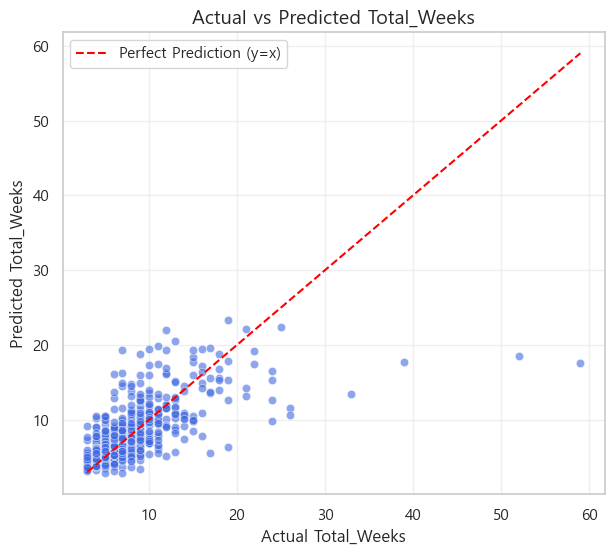

In [44]:
plt.figure(figsize=(7, 6))
sns.scatterplot(x=df_test_encoded["Total_Weeks"],
                y=df_test_encoded["Total_weeks_predict"],
                color="royalblue", alpha=0.6)

# 완벽 예측선 (y = x)
plt.plot([df_test_encoded["Total_Weeks"].min(), df_test_encoded["Total_Weeks"].max()],
         [df_test_encoded["Total_Weeks"].min(), df_test_encoded["Total_Weeks"].max()],
         color='red', linestyle='--', label='Perfect Prediction (y=x)')

plt.title("Actual vs Predicted Total_Weeks", fontsize=14)
plt.xlabel("Actual Total_Weeks")
plt.ylabel("Predicted Total_Weeks")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

c:\uni\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


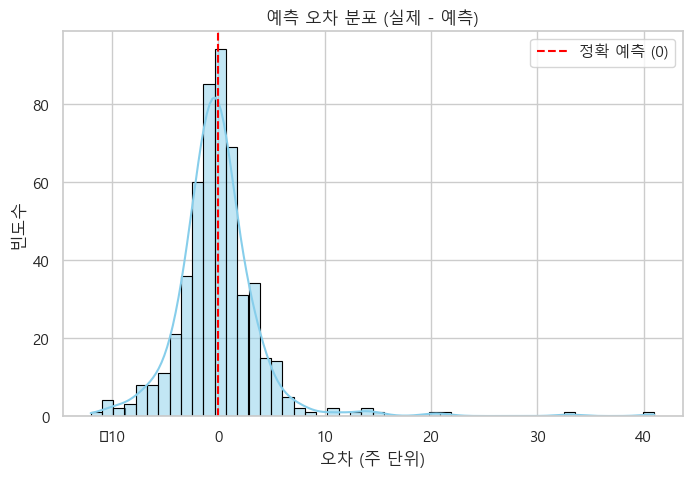

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 시각화 스타일 설정
sns.set(style="whitegrid", font="Malgun Gothic")  # 한글 폰트 설정 (Windows 기준)

# 오차 분포 히스토그램
plt.figure(figsize=(8,5))
sns.histplot(df_test_encoded["Diff"], kde=True, bins=50, color="skyblue", edgecolor="black")
plt.axvline(0, color="red", linestyle="--", label="정확 예측 (0)")
plt.title("예측 오차 분포 (실제 - 예측)")
plt.xlabel("오차 (주 단위)")
plt.ylabel("빈도수")
plt.legend()
plt.show()

In [46]:
print(df_test_encoded[ df_test_encoded["Abs_Diff"] >= 10 ][['Movie_Title','Total_Weeks','Total_weeks_predict']])

      Movie_Title  Total_Weeks  Total_weeks_predict
2078         색, 계           26            11.627335
2079           원스           33            13.421074
2082    저니 투 베들레헴            9            18.793754
2095     컴플리트 언노운           19             6.384958
2112    마당을 나온 암탉           24            12.679125
2168      퍼펙트 데이즈           39            17.731591
2262         데스노트            6            16.066383
2269      한국이 싫어서           17             5.597394
2367     가필드 더 무비           10            19.519339
2389  아치의 노래, 정태춘           24             9.806326
2423          클라라           12            22.064349
2485   권순분여사 납치사건            7            19.280022
2488       위대한 침묵           52            18.515379
2497   아픈 만큼 사랑한다           26            10.622469
2543   극장판 주술회전 0           59            17.559624


## 9월 상영 영화 예측하기

In [8]:
import pickle
import pandas as pd

In [9]:
from factor_analyzer import FactorAnalyzer

In [10]:
import joblib
FA_model = joblib.load("C:/Users/강태희/Documents/BAF-25-2-Marketing/week_predict/FA_model.pkl")

In [11]:
import joblib
scaler_FA = joblib.load("C:/Users/강태희/Documents/BAF-25-2-Marketing/week_predict/standard_scaler_FA.pkl")

c:\uni\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.5.1 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [12]:
predict_data= pd.read_csv("C:/Users/강태희/Documents/BAF-25-2-Marketing/model/model_predict_data.csv")

In [13]:
predict_data.head()

,Movie_Title,wk1_Audience,wk1_AudiencePerShow,wk2_Audience,wk2_AudiencePerShow,Show_Change,opening_Ho_Retention,wk1_Holiday_AudienceMean,wk1_Holiday_ShowMean,wk2_Holiday_AudienceMean,...,e247,e248,e249,e250,e251,e252,e253,e254,e255,e256
0,F1 더 무비,478085.0,18.453893,498575,21.791818,0.883120,0.919323,140722.5,5263.000000,129369.5,...,-0.000246,-0.020752,0.010559,-0.007599,-0.025391,0.008606,-0.003235,0.008972,0.028931,0.066406
1,강령: 귀신놀이,41447.0,20.733867,25043,14.013990,0.893947,0.426405,9892.0,375.000000,4218.0,...,0.004852,-0.045166,-0.014221,0.001099,-0.017456,-0.019287,-0.007996,-0.032715,0.034668,0.003586
2,극장판 귀멸의 칼날: 무한성편,1623200.0,63.005085,1504807,30.722887,1.901176,0.575226,552628.5,8626.500000,317886.5,...,-0.007050,-0.024902,-0.024536,0.004028,-0.035645,0.007935,-0.028687,0.023193,0.028076,-0.001259
3,긴키 지방의 어느 장소에 대하여,101649.0,32.506876,86929,20.677688,1.344420,0.766366,24380.0,664.333333,18684.0,...,-0.014587,-0.011475,-0.038818,0.008850,-0.039551,-0.001350,0.004028,-0.023438,0.036621,0.013672
4,꼬마마법사 주니토니,11403.0,22.625000,23195,21.697848,2.121032,0.638604,5701.5,252.000000,3641.0,...,0.013184,-0.046875,0.000866,0.047119,-0.024902,-0.006378,0.009399,0.004211,0.004547,0.028320


In [14]:
predict_data.tail()

,Movie_Title,wk1_Audience,wk1_AudiencePerShow,wk2_Audience,wk2_AudiencePerShow,Show_Change,opening_Ho_Retention,wk1_Holiday_AudienceMean,wk1_Holiday_ShowMean,wk2_Holiday_AudienceMean,...,e247,e248,e249,e250,e251,e252,e253,e254,e255,e256
24,제프 맥페트리지: 드로잉 라이프,1016.0,9.407407,591,7.296296,0.750000,0.388889,225.0,20.0,87.5,...,-0.001358,-0.027100,0.029907,0.041260,0.039795,-0.042969,-0.014771,-0.072266,0.048828,0.039307
25,좀비딸,1839091.0,52.868712,1480287,32.312211,1.316967,0.757123,448513.5,7295.0,339580.0,...,0.017944,-0.004669,-0.005066,0.008728,-0.064453,-0.050537,-0.011353,0.035156,0.021240,0.042236
26,첫사랑 엔딩,64342.0,18.758601,34789,12.284251,0.825656,0.628825,15864.5,634.0,9976.0,...,0.041260,-0.062012,-0.011841,0.012146,-0.073242,-0.017822,-0.003601,0.001892,0.042725,0.026123
27,킹 오브 킹스,375163.0,28.838727,341684,24.065643,1.091398,0.792880,131457.5,3231.5,104230.0,...,0.003906,-0.024780,-0.024780,0.017822,0.002365,-0.017212,-0.003784,-0.007263,0.038086,0.002365
28,프리키 프라이데이 2,21858.0,8.180389,6682,5.508656,0.453967,0.109652,4377.5,476.5,480.0,...,0.017944,-0.016113,-0.006042,-0.001411,-0.057861,-0.049316,0.003464,-0.005188,0.062500,0.005768


In [15]:
import pandas as pd

data = {
    "Movie_Title": [
        "F1 더 무비", "강령: 귀신놀이", "극장판 귀멸의 칼날: 무한성편", "긴키 지방의 어느 장소에 대하여", "꼬마마법사 주니토니",
        "나의 아픈, 사랑이야기", "노바디2", "노이즈", "더 폴: 디렉터스 컷", "독립군: 끝나지 않은 전쟁",
        "명탐정 코난: 척안의 잔상", "미세리코르디아", "미션 임파서블: 파이널 레코닝", "배드 가이즈 2",
        "베베핀 극장판: 사라진 베베핀과 핑크퐁 대모험", "스머프", "아임 스틸 히어", "악마가 이사왔다",
        "야당: 익스텐디드 컷", "어글리 시스터", "온리 갓 노우즈 에브리띵", "전지적 독자 시점", "첫사랑 엔딩",
        "킹 오브 킹스", "프리키 프라이데이 2"
    ],
    "Total_Audience_Predict": [
        1375423, 58978, 4585204, 120556, 2402, 10514, 81217, 156050, 12606, 9266,
        1063251, 674, 634303, 490209, 51039, 155995, 2178, 931681, 31355, 20774,
        5010, 3691735, 104933, 1006120, 30775
    ]
}

df = pd.DataFrame(data)

print(df)

                  Movie_Title  Total_Audience_Predict
0                     F1 더 무비                 1375423
1                    강령: 귀신놀이                   58978
2            극장판 귀멸의 칼날: 무한성편                 4585204
3           긴키 지방의 어느 장소에 대하여                  120556
4                  꼬마마법사 주니토니                    2402
5                나의 아픈, 사랑이야기                   10514
6                        노바디2                   81217
7                         노이즈                  156050
8                 더 폴: 디렉터스 컷                   12606
9              독립군: 끝나지 않은 전쟁                    9266
10             명탐정 코난: 척안의 잔상                 1063251
11                    미세리코르디아                     674
12           미션 임파서블: 파이널 레코닝                  634303
13                   배드 가이즈 2                  490209
14  베베핀 극장판: 사라진 베베핀과 핑크퐁 대모험                   51039
15                        스머프                  155995
16                   아임 스틸 히어                    2178
17                   악마가 이사왔

In [16]:
predict_data= pd.merge(predict_data, df, on="Movie_Title")

In [17]:
predict_data.head()

,Movie_Title,wk1_Audience,wk1_AudiencePerShow,wk2_Audience,wk2_AudiencePerShow,Show_Change,opening_Ho_Retention,wk1_Holiday_AudienceMean,wk1_Holiday_ShowMean,wk2_Holiday_AudienceMean,...,e248,e249,e250,e251,e252,e253,e254,e255,e256,Total_Audience_Predict
0,F1 더 무비,478085.0,18.453893,498575,21.791818,0.883120,0.919323,140722.5,5263.000000,129369.5,...,-0.020752,0.010559,-0.007599,-0.025391,0.008606,-0.003235,0.008972,0.028931,0.066406,1375423
1,강령: 귀신놀이,41447.0,20.733867,25043,14.013990,0.893947,0.426405,9892.0,375.000000,4218.0,...,-0.045166,-0.014221,0.001099,-0.017456,-0.019287,-0.007996,-0.032715,0.034668,0.003586,58978
2,극장판 귀멸의 칼날: 무한성편,1623200.0,63.005085,1504807,30.722887,1.901176,0.575226,552628.5,8626.500000,317886.5,...,-0.024902,-0.024536,0.004028,-0.035645,0.007935,-0.028687,0.023193,0.028076,-0.001259,4585204
3,긴키 지방의 어느 장소에 대하여,101649.0,32.506876,86929,20.677688,1.344420,0.766366,24380.0,664.333333,18684.0,...,-0.011475,-0.038818,0.008850,-0.039551,-0.001350,0.004028,-0.023438,0.036621,0.013672,120556
4,꼬마마법사 주니토니,11403.0,22.625000,23195,21.697848,2.121032,0.638604,5701.5,252.000000,3641.0,...,-0.046875,0.000866,0.047119,-0.024902,-0.006378,0.009399,0.004211,0.004547,0.028320,2402


In [18]:
predict_data.tail()

,Movie_Title,wk1_Audience,wk1_AudiencePerShow,wk2_Audience,wk2_AudiencePerShow,Show_Change,opening_Ho_Retention,wk1_Holiday_AudienceMean,wk1_Holiday_ShowMean,wk2_Holiday_AudienceMean,...,e248,e249,e250,e251,e252,e253,e254,e255,e256,Total_Audience_Predict
20,온리 갓 노우즈 에브리띵,10999.0,9.962862,7899,6.432410,1.112319,0.222871,3340.5,331.0,744.5,...,-0.036133,-0.000645,0.032959,-0.018066,0.010193,-0.006073,-0.003906,0.062012,0.031738,5010
21,전지적 독자 시점,622914.0,24.631816,346144,19.233428,0.711653,0.235940,173307.0,4478.0,40890.0,...,-0.036865,-0.005066,0.020752,-0.013428,0.018311,-0.004242,0.039062,0.025879,0.022827,3691735
22,첫사랑 엔딩,64342.0,18.758601,34789,12.284251,0.825656,0.628825,15864.5,634.0,9976.0,...,-0.062012,-0.011841,0.012146,-0.073242,-0.017822,-0.003601,0.001892,0.042725,0.026123,104933
23,킹 오브 킹스,375163.0,28.838727,341684,24.065643,1.091398,0.792880,131457.5,3231.5,104230.0,...,-0.024780,-0.024780,0.017822,0.002365,-0.017212,-0.003784,-0.007263,0.038086,0.002365,1006120
24,프리키 프라이데이 2,21858.0,8.180389,6682,5.508656,0.453967,0.109652,4377.5,476.5,480.0,...,-0.016113,-0.006042,-0.001411,-0.057861,-0.049316,0.003464,-0.005188,0.062500,0.005768,30775


In [19]:
temp1 = predict_data[["Total_Audience_Predict", "wk1_Audience", "wk2_Audience"]].copy()
temp1.loc[:,"con_wk2"] = temp1["wk1_Audience"] + temp1["wk2_Audience"]
temp1.loc[:,"wk1_wk2"] = round((temp1["con_wk2"]/temp1["wk1_Audience"]-1)*100, 2)
temp1.loc[:,"wk2_total"] = round((temp1["Total_Audience_Predict"]/temp1["con_wk2"]-1)*100, 2)

In [20]:
temp1.head()

,Total_Audience_Predict,wk1_Audience,wk2_Audience,con_wk2,wk1_wk2,wk2_total
0,1375423,478085.0,498575,976660.0,104.29,40.83
1,58978,41447.0,25043,66490.0,60.42,-11.30
2,4585204,1623200.0,1504807,3128007.0,92.71,46.59
3,120556,101649.0,86929,188578.0,85.52,-36.07
4,2402,11403.0,23195,34598.0,203.41,-93.06


In [21]:
cluster_1 = temp1[["wk1_wk2", "wk2_total"]].copy()
cluster_1.describe()

,wk1_wk2,wk2_total
count,25.000000,25.000000
mean,87.241200,2.732800
std,55.416138,86.443899
min,23.460000,-93.060000
25%,54.890000,-67.480000
50%,71.010000,-4.720000
75%,104.290000,40.830000
max,234.960000,280.960000


In [22]:
cluster_1.loc[:,"ratio"] = cluster_1["wk2_total"]/cluster_1["wk1_wk2"]

In [23]:
# 33, 66 백분위수 계산
p33 = cluster_1['ratio'].quantile(0.33)
p66 = cluster_1['ratio'].quantile(0.66)

print(f"33백분위수 (하위 그룹 경계): {p33:.2f}")
print(f"66백분위수 (상위 그룹 경계): {p66:.2f}")

33백분위수 (하위 그룹 경계): -0.42
66백분위수 (상위 그룹 경계): 0.37


In [24]:
def classify_ratio(ratio):
    if ratio < p66:
        return '초반 폭발형'
    elif p66 <= ratio < 1:
        return '중반 균형형'
    else:
        return '후반 입소문형'

cluster_1['hit_category'] = cluster_1['ratio'].apply(classify_ratio)

In [25]:
cluster_1.head()

,wk1_wk2,wk2_total,ratio,hit_category
0,104.29,40.83,0.391504,중반 균형형
1,60.42,-11.30,-0.187024,초반 폭발형
2,92.71,46.59,0.502535,중반 균형형
3,85.52,-36.07,-0.421773,초반 폭발형
4,203.41,-93.06,-0.457500,초반 폭발형


In [26]:
predict_data['Month_sin'] = np.sin(2 * np.pi * predict_data['Month'] / 12)
predict_data['Month_cos'] = np.cos(2 * np.pi * predict_data['Month'] / 12)
predict_data.drop(columns=["Month"], inplace=True)

In [67]:
print(FA_model.keys())

dict_keys(['fa_model', 'feature_list'])


In [42]:
print(scaler_FA.keys())

dict_keys(['scaler_model', 'feature_list'])


In [27]:
scaler = scaler_FA['scaler_model']
model_predict_scaled = scaler.transform(predict_data[scaler_FA['feature_list']])

# (2) 요인 점수 계산
FA_scores = FA_model['fa_model'].transform(model_predict_scaled)

# (3) DataFrame으로 변환
FA_scores_df = pd.DataFrame(
    FA_scores,
    columns=[f"FA{i+1}" for i in range(FA_scores.shape[1])]
)

# (4) 원본 데이터에 병합
model_predict_with_FA = pd.concat(
    [predict_data.reset_index(drop=True), FA_scores_df],
    axis=1
)

# (5) 확인
print(model_predict_with_FA.head())

         Movie_Title  wk1_Audience  wk1_AudiencePerShow  wk2_Audience  \
0            F1 더 무비      478085.0            18.453893        498575   
1           강령: 귀신놀이       41447.0            20.733867         25043   
2   극장판 귀멸의 칼날: 무한성편     1623200.0            63.005085       1504807   
3  긴키 지방의 어느 장소에 대하여      101649.0            32.506876         86929   
4         꼬마마법사 주니토니       11403.0            22.625000         23195   

   wk2_AudiencePerShow  Show_Change  opening_Ho_Retention  \
0            21.791818     0.883120              0.919323   
1            14.013990     0.893947              0.426405   
2            30.722887     1.901176              0.575226   
3            20.677688     1.344420              0.766366   
4            21.697848     2.121032              0.638604   

   wk1_Holiday_AudienceMean  wk1_Holiday_ShowMean  wk2_Holiday_AudienceMean  \
0                  140722.5           5263.000000                  129369.5   
1                    9892.0         

In [28]:
model_predict_with_FA.head()

,Movie_Title,wk1_Audience,wk1_AudiencePerShow,wk2_Audience,wk2_AudiencePerShow,Show_Change,opening_Ho_Retention,wk1_Holiday_AudienceMean,wk1_Holiday_ShowMean,wk2_Holiday_AudienceMean,...,e255,e256,Total_Audience_Predict,Month_sin,Month_cos,FA1,FA2,FA3,FA4,FA5
0,F1 더 무비,478085.0,18.453893,498575,21.791818,0.883120,0.919323,140722.5,5263.000000,129369.5,...,0.028931,0.066406,1375423,1.224647e-16,-1.000000,1.045336,-0.859724,0.673085,1.189796,0.186256
1,강령: 귀신놀이,41447.0,20.733867,25043,14.013990,0.893947,0.426405,9892.0,375.000000,4218.0,...,0.034668,0.003586,58978,-8.660254e-01,-0.500000,-0.483908,-0.328857,0.299285,-0.132491,-0.243968
2,극장판 귀멸의 칼날: 무한성편,1623200.0,63.005085,1504807,30.722887,1.901176,0.575226,552628.5,8626.500000,317886.5,...,0.028076,-0.001259,4585204,-8.660254e-01,-0.500000,5.675502,0.350226,0.954025,0.746517,-0.291508
3,긴키 지방의 어느 장소에 대하여,101649.0,32.506876,86929,20.677688,1.344420,0.766366,24380.0,664.333333,18684.0,...,0.036621,0.013672,120556,-8.660254e-01,-0.500000,-0.318672,0.152934,-0.755732,0.664461,1.677598
4,꼬마마법사 주니토니,11403.0,22.625000,23195,21.697848,2.121032,0.638604,5701.5,252.000000,3641.0,...,0.004547,0.028320,2402,-5.000000e-01,-0.866025,-0.473066,-0.223365,-1.617940,0.332013,-1.094650


In [29]:
hit_category_series = cluster_1['hit_category']

final_df = pd.concat([model_predict_with_FA, hit_category_series], axis=1)

# 결과 확인 
print(final_df.head())

         Movie_Title  wk1_Audience  wk1_AudiencePerShow  wk2_Audience  \
0            F1 더 무비      478085.0            18.453893        498575   
1           강령: 귀신놀이       41447.0            20.733867         25043   
2   극장판 귀멸의 칼날: 무한성편     1623200.0            63.005085       1504807   
3  긴키 지방의 어느 장소에 대하여      101649.0            32.506876         86929   
4         꼬마마법사 주니토니       11403.0            22.625000         23195   

   wk2_AudiencePerShow  Show_Change  opening_Ho_Retention  \
0            21.791818     0.883120              0.919323   
1            14.013990     0.893947              0.426405   
2            30.722887     1.901176              0.575226   
3            20.677688     1.344420              0.766366   
4            21.697848     2.121032              0.638604   

   wk1_Holiday_AudienceMean  wk1_Holiday_ShowMean  wk2_Holiday_AudienceMean  \
0                  140722.5           5263.000000                  129369.5   
1                    9892.0         

In [30]:
final_df.head()

,Movie_Title,wk1_Audience,wk1_AudiencePerShow,wk2_Audience,wk2_AudiencePerShow,Show_Change,opening_Ho_Retention,wk1_Holiday_AudienceMean,wk1_Holiday_ShowMean,wk2_Holiday_AudienceMean,...,e256,Total_Audience_Predict,Month_sin,Month_cos,FA1,FA2,FA3,FA4,FA5,hit_category
0,F1 더 무비,478085.0,18.453893,498575,21.791818,0.883120,0.919323,140722.5,5263.000000,129369.5,...,0.066406,1375423,1.224647e-16,-1.000000,1.045336,-0.859724,0.673085,1.189796,0.186256,중반 균형형
1,강령: 귀신놀이,41447.0,20.733867,25043,14.013990,0.893947,0.426405,9892.0,375.000000,4218.0,...,0.003586,58978,-8.660254e-01,-0.500000,-0.483908,-0.328857,0.299285,-0.132491,-0.243968,초반 폭발형
2,극장판 귀멸의 칼날: 무한성편,1623200.0,63.005085,1504807,30.722887,1.901176,0.575226,552628.5,8626.500000,317886.5,...,-0.001259,4585204,-8.660254e-01,-0.500000,5.675502,0.350226,0.954025,0.746517,-0.291508,중반 균형형
3,긴키 지방의 어느 장소에 대하여,101649.0,32.506876,86929,20.677688,1.344420,0.766366,24380.0,664.333333,18684.0,...,0.013672,120556,-8.660254e-01,-0.500000,-0.318672,0.152934,-0.755732,0.664461,1.677598,초반 폭발형
4,꼬마마법사 주니토니,11403.0,22.625000,23195,21.697848,2.121032,0.638604,5701.5,252.000000,3641.0,...,0.028320,2402,-5.000000e-01,-0.866025,-0.473066,-0.223365,-1.617940,0.332013,-1.094650,초반 폭발형


In [31]:
#범주형 변수 원핫인코딩
cat_cols = ['Pandemic', 'Grade', 'Main_Country','hit_category']

# 원핫인코딩
final_data = pd.get_dummies(final_df, columns=cat_cols, drop_first=False, dtype=int)

# 한글 → 영어 변수명 매핑
rename_map = {
    'Pandemic_0': 'Pandemic_0',
    'Pandemic_1': 'Pandemic_1',
    'Pandemic_2': 'Pandemic_2',
    # Grade (관람등급)
    'Grade_전체관람가': 'Grade_All',
    'Grade_12세이상관람가': 'Grade_12plus',
    'Grade_15세이상관람가': 'Grade_15plus',
    'Grade_청소년관람불가': 'Grade_Restricted',

    # Main_Country (국가)
    'Main_Country_한국': 'Country_KR',
    'Main_Country_미국': 'Country_US',
    'Main_Country_일본': 'Country_JP',
    'Main_Country_기타': 'Country_Other',

    # hit_category (영화 흥행 패턴)
    'hit_category_초반 폭발형': 'Early_Explosion',
    'hit_category_중반 균형형': 'Mid_Balanced',
    'hit_category_후반 입소문형': 'Later_Viral'
}
final_data = final_data.rename(columns=rename_map)

In [32]:
final_data.head()

,Movie_Title,wk1_Audience,wk1_AudiencePerShow,wk2_Audience,wk2_AudiencePerShow,Show_Change,opening_Ho_Retention,wk1_Holiday_AudienceMean,wk1_Holiday_ShowMean,wk2_Holiday_AudienceMean,...,Grade_15plus,Grade_All,Grade_Restricted,Country_Other,Country_US,Country_JP,Country_KR,Mid_Balanced,Early_Explosion,Later_Viral
0,F1 더 무비,478085.0,18.453893,498575,21.791818,0.883120,0.919323,140722.5,5263.000000,129369.5,...,0,0,0,0,1,0,0,1,0,0
1,강령: 귀신놀이,41447.0,20.733867,25043,14.013990,0.893947,0.426405,9892.0,375.000000,4218.0,...,1,0,0,0,0,0,1,0,1,0
2,극장판 귀멸의 칼날: 무한성편,1623200.0,63.005085,1504807,30.722887,1.901176,0.575226,552628.5,8626.500000,317886.5,...,1,0,0,0,0,1,0,1,0,0
3,긴키 지방의 어느 장소에 대하여,101649.0,32.506876,86929,20.677688,1.344420,0.766366,24380.0,664.333333,18684.0,...,1,0,0,0,0,1,0,0,1,0
4,꼬마마법사 주니토니,11403.0,22.625000,23195,21.697848,2.121032,0.638604,5701.5,252.000000,3641.0,...,0,1,0,0,0,0,1,0,1,0


In [33]:
final_data.columns

Index(['Movie_Title', 'wk1_Audience', 'wk1_AudiencePerShow', 'wk2_Audience',
       'wk2_AudiencePerShow', 'Show_Change', 'opening_Ho_Retention',
       'wk1_Holiday_AudienceMean', 'wk1_Holiday_ShowMean',
       'wk2_Holiday_AudienceMean',
       ...
       'Grade_15plus', 'Grade_All', 'Grade_Restricted', 'Country_Other',
       'Country_US', 'Country_JP', 'Country_KR', 'Mid_Balanced',
       'Early_Explosion', 'Later_Viral'],
      dtype='object', length=293)

In [34]:
# final_data는 2025년 9월 상영 영화이기에 Pandemic_0과 Pandemic_1의 열이 지정되지 않았음
# 따라서 Pandemic_0과 Pandemic_1 열을 생성해야 함 
# 'Pandemic_0' 열을 추가하고 모든 값을 0으로 지정
final_data['Pandemic_0'] = 0

# 'Pandemic_1' 열을 추가하고 모든 값을 0으로 지정
final_data['Pandemic_1'] = 0

# 결과 확인 (선택 사항)
print(final_data[['Pandemic_0', 'Pandemic_1']].head())

   Pandemic_0  Pandemic_1
0           0           0
1           0           0
2           0           0
3           0           0
4           0           0


## 총상영주차 예측 모델 돌려보기

In [35]:
# 1. 타겟 (Y) 컬럼 목록 정의

target_columns = ['Total_Weeks']

# 2. X (특성 데이터) 생성: 타겟 컬럼들을 제외한 나머지
X = combined_encoded[["FA1","FA2","FA3","FA4","FA5", "Pandemic_0", "Pandemic_1", "Pandemic_2", 
                      "Country_Other","Country_US", "Country_JP","Country_KR", 
                      'Early_Explosion', 'Mid_Balanced','Later_Viral']]

# 3. Y (타겟 데이터) 생성: 타겟 컬럼들만 선택
y = combined_encoded[target_columns]

# 결과 확인
print(X.columns.tolist())
print(y.columns.tolist())

['FA1', 'FA2', 'FA3', 'FA4', 'FA5', 'Pandemic_0', 'Pandemic_1', 'Pandemic_2', 'Country_Other', 'Country_US', 'Country_JP', 'Country_KR', 'Early_Explosion', 'Mid_Balanced', 'Later_Viral']
['Total_Weeks']


In [36]:
X_test= final_data[["FA1","FA2","FA3","FA4","FA5",
                    "Pandemic_0", "Pandemic_1", "Pandemic_2", 
                    "Country_Other","Country_US", "Country_JP","Country_KR", 
                    'Early_Explosion', 'Mid_Balanced','Later_Viral']]

In [37]:
best_params = {
    'iterations': 982,
    'depth': 7,
    'learning_rate': 0.14134663581240323,
    'l2_leaf_reg': 1.9155329313504152,
    'border_count': 140,
    'bagging_temperature': 0.4921993940241448,
    'random_strength': 2.956849681363772
}

In [38]:
from catboost import CatBoostRegressor

final_model = CatBoostRegressor(**best_params)
final_model.fit(X, y)

final_data['Total_weeks_predict'] = final_model.predict(X_test)

0:	learn: 4.9865713	total: 70.3ms	remaining: 1m 8s
1:	learn: 4.7466501	total: 72.4ms	remaining: 35.5s
2:	learn: 4.5752839	total: 74ms	remaining: 24.2s
3:	learn: 4.4247223	total: 75.5ms	remaining: 18.5s
4:	learn: 4.2696929	total: 77.2ms	remaining: 15.1s
5:	learn: 4.1530798	total: 78.6ms	remaining: 12.8s
6:	learn: 4.0626512	total: 80.3ms	remaining: 11.2s
7:	learn: 3.9956439	total: 81.9ms	remaining: 9.97s
8:	learn: 3.9382188	total: 82.8ms	remaining: 8.95s
9:	learn: 3.8737741	total: 84.4ms	remaining: 8.2s
10:	learn: 3.8018348	total: 85.8ms	remaining: 7.58s
11:	learn: 3.7457581	total: 87.6ms	remaining: 7.08s
12:	learn: 3.7073355	total: 89.3ms	remaining: 6.66s
13:	learn: 3.6613345	total: 90.8ms	remaining: 6.28s
14:	learn: 3.6228931	total: 92.2ms	remaining: 5.94s
15:	learn: 3.5979542	total: 93.9ms	remaining: 5.67s
16:	learn: 3.5910557	total: 94.5ms	remaining: 5.36s
17:	learn: 3.5559322	total: 96.4ms	remaining: 5.16s
18:	learn: 3.5480491	total: 97.2ms	remaining: 4.93s
19:	learn: 3.5020714	tota

In [39]:
final_data[['Movie_Title','Total_Audience_Predict','Total_weeks_predict']]

,Movie_Title,Total_Audience_Predict,Total_weeks_predict
0,F1 더 무비,1375423,13.890867
1,강령: 귀신놀이,58978,6.484457
2,극장판 귀멸의 칼날: 무한성편,4585204,17.746816
3,긴키 지방의 어느 장소에 대하여,120556,10.120173
4,꼬마마법사 주니토니,2402,7.364832
5,"나의 아픈, 사랑이야기",10514,6.113383
6,노바디2,81217,18.426138
7,노이즈,156050,10.177006
8,더 폴: 디렉터스 컷,12606,6.326836
9,독립군: 끝나지 않은 전쟁,9266,8.860794
